In [1]:
import os
import sys
sys.path.append(os.path.join(".."))

from models import *

In [2]:
model_regular = MLP(
    architecture=MLPArchitecture(2, [10, 10], 5),
    dataset_name="rings5-sparse",
    data_dir="../data",
    activation_func=Tanh(),
    last_layer_activation_func=Softmax(),
    loss_function="cross_entropy",
)
model_regular.train(
    epochs=5000,
    learning_rate=0.01,
    batch=True,
    batch_size=10,
    optimizer="rmsprop",
    rms_beta=0.99,
    save_till_best=True
)

Training from age 0: (best_loss_test: 0.54, loss_test: 0.97) : 100%|██████████| 5000/5000 [00:18<00:00, 265.40it/s]

--------------------
Reverting to best model at age 4484
Loss on train set: 0.37	Loss on test set: 0.54
--------------------
Model training finished at age 4484 with loss 0.54 on test set


In [23]:
model_l1 = MLP(
    architecture=MLPArchitecture(2, [10, 10], 5),
    dataset_name="rings5-sparse",
    data_dir="../data",
    activation_func=Tanh(),
    last_layer_activation_func=Softmax(),
    loss_function="cross_entropy",
)
model_l1.train(
    epochs=20000,
    learning_rate=0.01,
    batch=True,
    batch_size=10,
    optimizer="rmsprop",
    rms_beta=0.99,
    regularization="l1",
    reg_lambda=1e-4,
    save_till_best=True
)

Training from age 0: (best_loss_test: 0.66, loss_test: 0.9)  : 100%|██████████| 20000/20000 [01:11<00:00, 281.21it/s]

--------------------
Reverting to best model at age 11579
Loss on train set: 0.45	Loss on test set: 0.66
--------------------
Model training finished at age 11579 with loss 0.66 on test set


In [33]:
model_l2 = MLP(
    architecture=MLPArchitecture(2, [10, 10], 5),
    dataset_name="rings5-sparse",
    data_dir="../data",
    activation_func=Tanh(),
    last_layer_activation_func=Softmax(),
    loss_function="cross_entropy",
    target_precision=1e-4,
    name="l2_regularization"
)
model_l2.train(
    epochs=30000,
    learning_rate=0.01,
    batch=True,
    batch_size=10,
    optimizer="rmsprop",
    rms_beta=0.99,
    regularization="l2",
    reg_lambda=1e-4,
    save_till_best=True
)

Training from age 0: (best_loss_test: 0.6333, loss_test: 0.9216): 100%|██████████| 30000/30000 [01:51<00:00, 269.85it/s]

--------------------
Reverting to best model at age 2636
Loss on train set: 0.3835	Loss on test set: 0.6333
--------------------
Model training finished at age 2636 with loss 0.6328 on test set


Model: model
Age: 4484
Train Loss: 0.37
Test Loss: 0.54
Accuracy: 0.793
F1 Score: 0.7926
Model made 1586 / 2000 correct predictions on the test set.
There were 414 incorrect predictions.


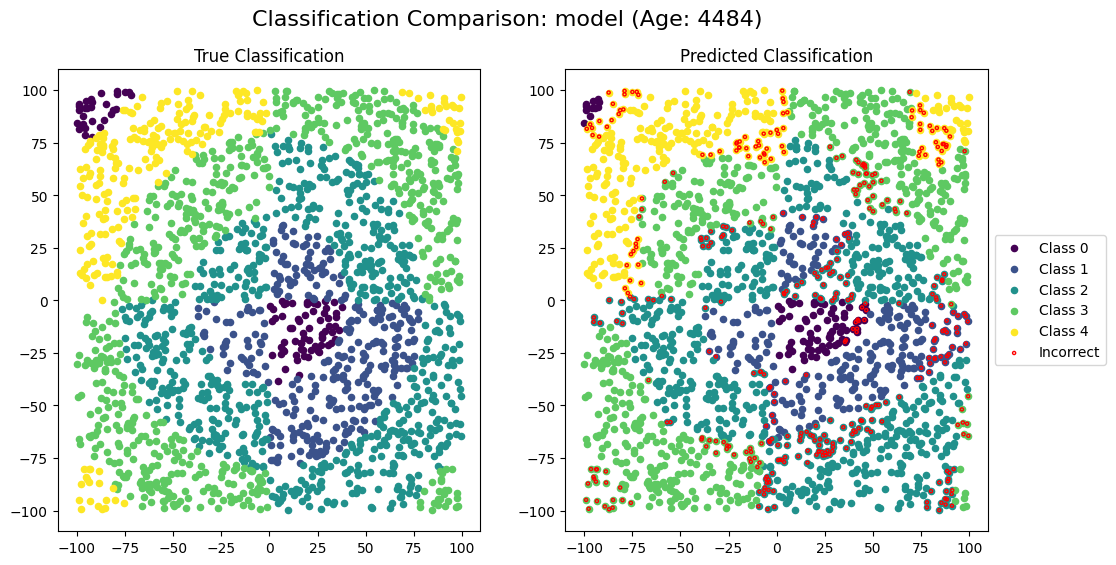

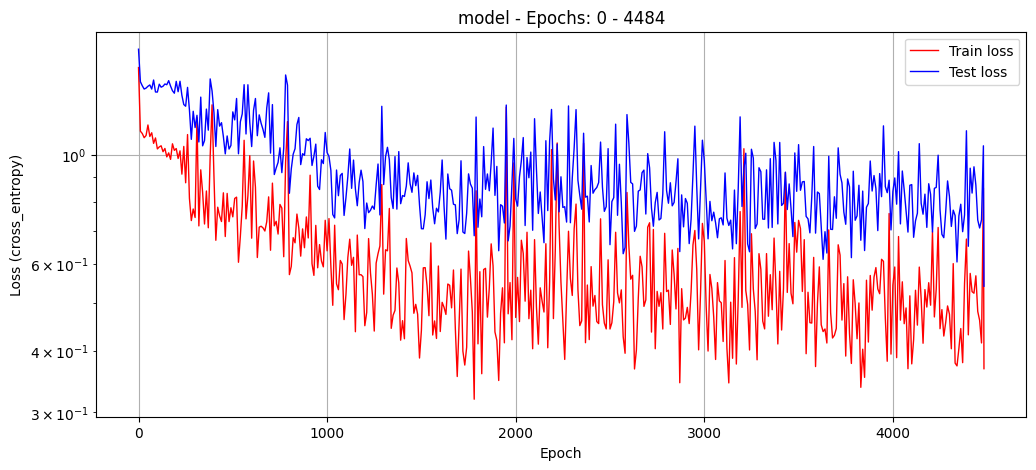

In [35]:
model_regular.plot_classification_comparison()
model_regular.plot_history(smoothing_interval=10)

Model: model
Age: 11579
Train Loss: 0.45
Test Loss: 0.66
Accuracy: 0.7045
F1 Score: 0.7014
Model made 1409 / 2000 correct predictions on the test set.
There were 591 incorrect predictions.


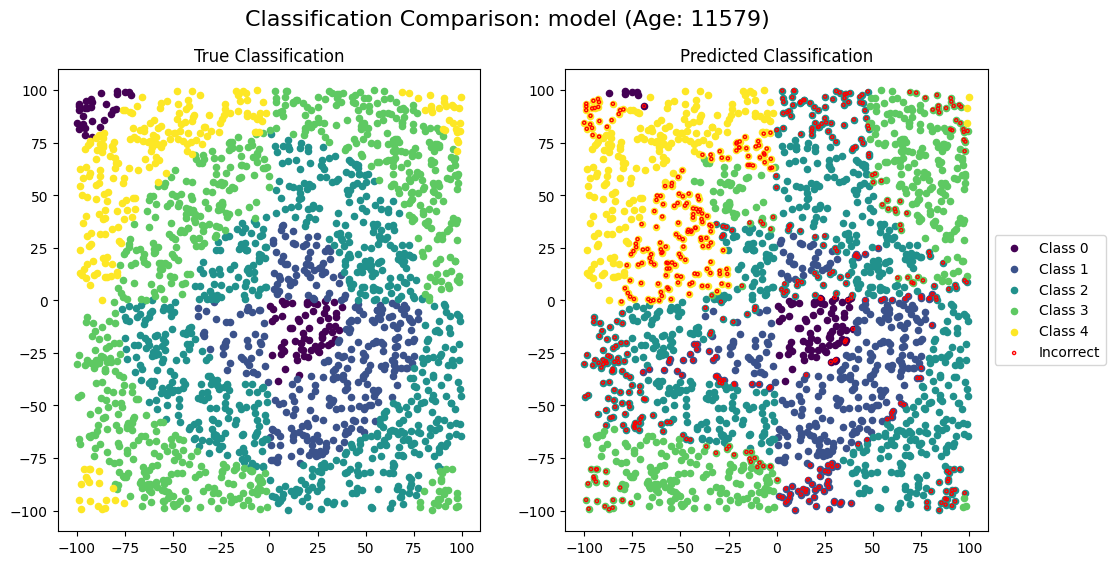

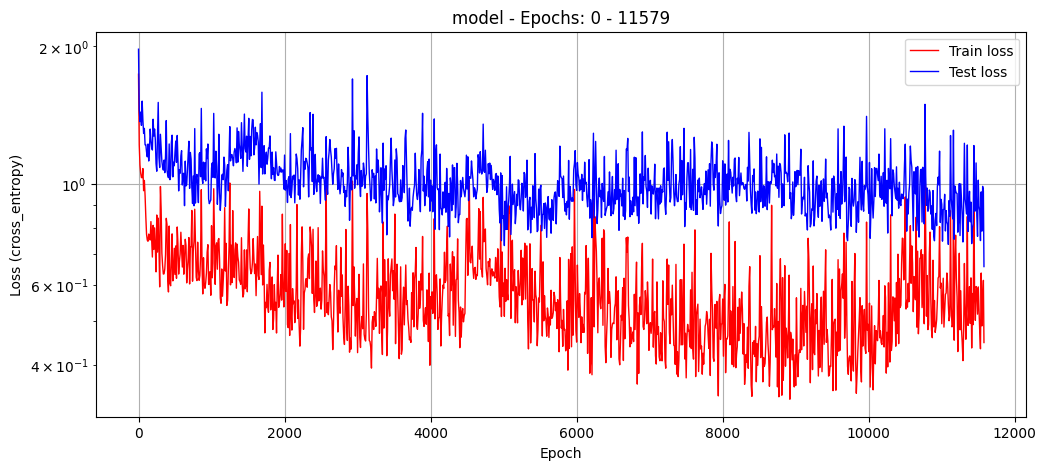

In [31]:
model_l1.plot_classification_comparison()
model_l1.plot_history(smoothing_interval=10)

Model: l2_regularization
Age: 2636
Train Loss: 0.383
Test Loss: 0.6328
Accuracy: 0.743
F1 Score: 0.7432
Model made 1486 / 2000 correct predictions on the test set.
There were 514 incorrect predictions.


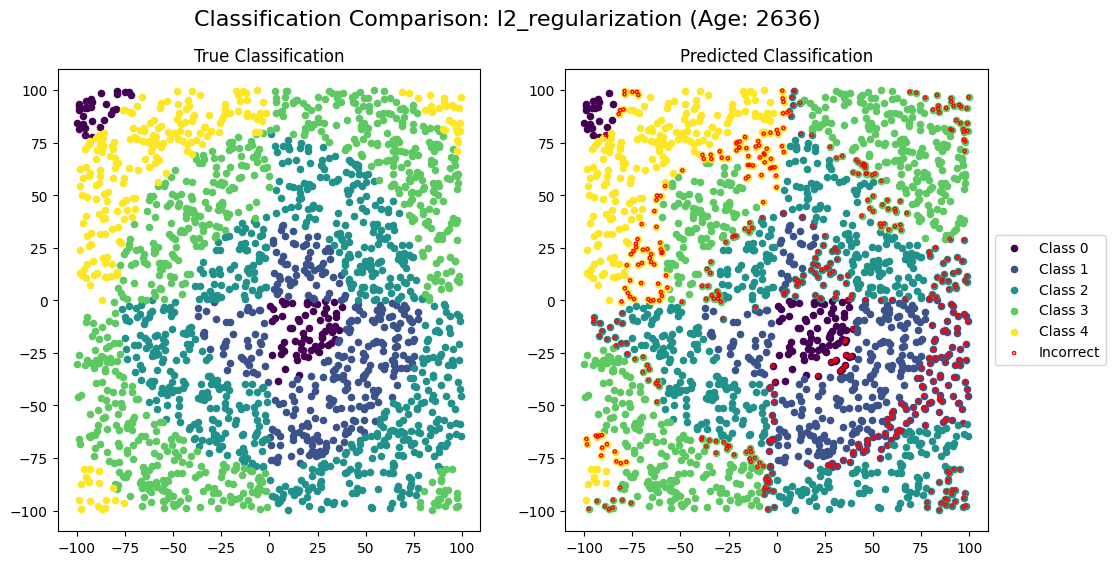

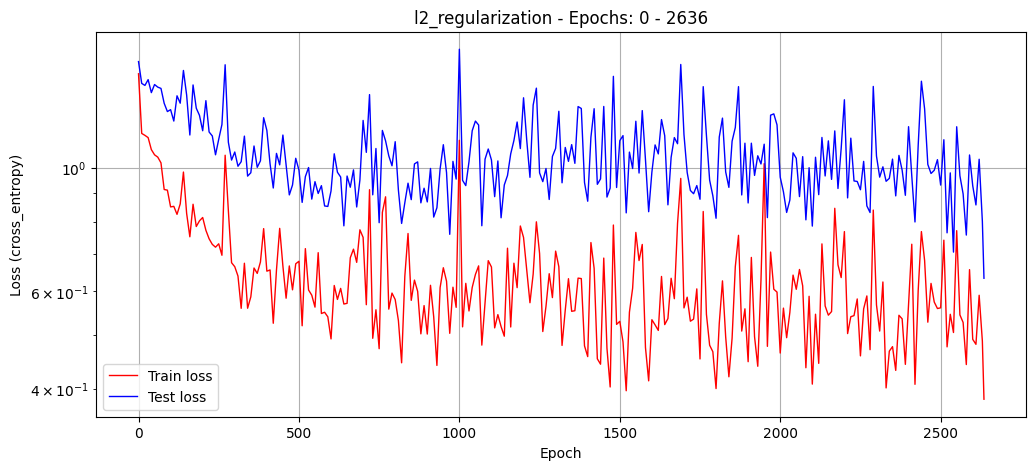

In [34]:
model_l2.plot_classification_comparison()
model_l2.plot_history(smoothing_interval=10)